In [73]:
import os
import numpy as np
from scipy import sparse
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

In [53]:
def convert_to_sparse_matrix(docs):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in docs:
        for term in d:
            index = vocabulary.setdefault(term, len(vocabulary))
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    return csr_matrix((data, indices, indptr), dtype=int)

In [54]:
data_dir = 'messages'
messages = []
y = []
for filename in os.listdir(data_dir):
    with open(os.path.join(data_dir, filename)) as file:
        subject = file.readline()
        skip = file.readline()
        content = file.readline()
        messages.append(np.array(content.split()))
        #messages.append(content.split())
    if "legit" in filename:
        y.append("legit")
    else:
        y.append("spam")

In [9]:
#messages

In [55]:
x = convert_to_sparse_matrix(messages)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [119]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [120]:
#clf.get_params()

In [121]:
y_pred = clf.predict(x_train)

In [122]:
print(classification_report(y_train, y_pred, zero_division = 0))

              precision    recall  f1-score   support

       legit       0.99      0.96      0.97       411
        spam       0.95      0.98      0.97       319

    accuracy                           0.97       730
   macro avg       0.97      0.97      0.97       730
weighted avg       0.97      0.97      0.97       730



In [123]:
y_pred = clf.predict(x_test)

In [124]:
print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

       legit       0.97      0.95      0.96       199
        spam       0.95      0.96      0.95       161

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



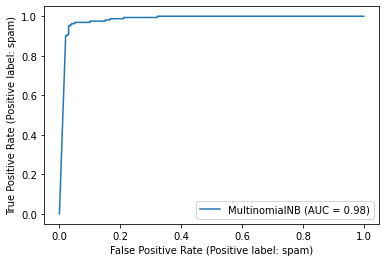

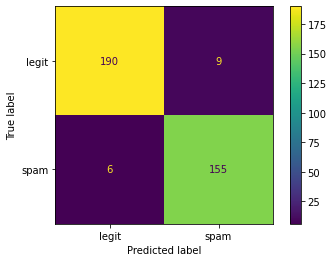

In [74]:
metrics.plot_roc_curve(clf, x_test, y_test) 
plot_confusion_matrix(clf, x_test, y_test) 
plt.show()

In [139]:
clf = MultinomialNB(class_prior = [0.54, 0.56])
clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)
print(classification_report(y_train, y_pred, zero_division = 0))

              precision    recall  f1-score   support

       legit       0.99      0.96      0.97       411
        spam       0.95      0.98      0.97       319

    accuracy                           0.97       730
   macro avg       0.97      0.97      0.97       730
weighted avg       0.97      0.97      0.97       730



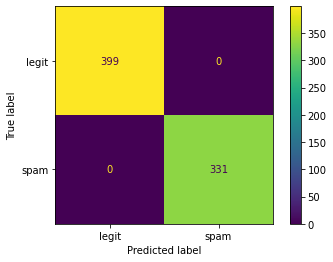

In [140]:
plot_confusion_matrix(clf, x_train, y_pred) 
plt.show()